<a href="https://colab.research.google.com/github/FabioAntonioSiqueira/lia1_2024_1/blob/main/Entregas%20-%20F%C3%A1bio%20Siqueira/Aula_07_Construindo_um_modelo_com_TensorFlow_Dogs%26Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Construindo um Modelo com Tensorflow - 🐶 🐱!
Problema: uma imagem, dizer se é um dog ou um cat.

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

Treinamento: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
Teste: 1.000 imagens de dogs e cats.
Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Não há mágica. Há matemática! 🧙

Fonte de dados

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso dataset Dogs and Cats.

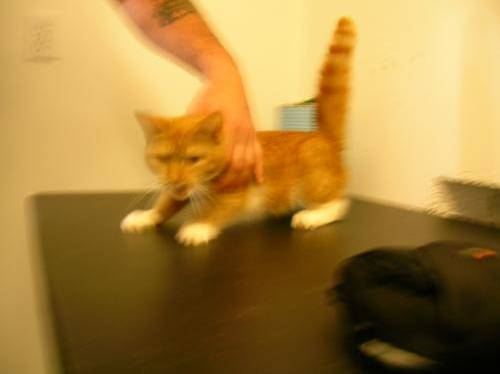

In [ ]:
from IPython.display import Image
Image(filename = '/content/drive/MyDrive/Colab Notebooks/Aula 07/dataset_treino/Cats/cat.0.jpg')

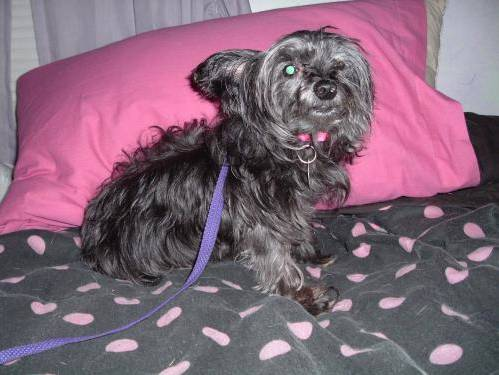

In [ ]:
Image(filename = '/content/drive/MyDrive/Colab Notebooks/Aula 07/dataset_treino/Dogs/dog.0.jpg')

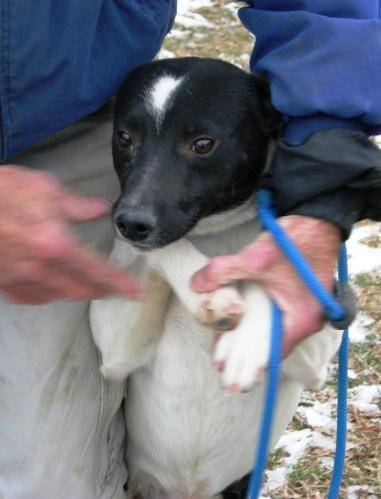

In [ ]:
Image(filename = '/content/drive/MyDrive/Colab Notebooks/Aula 07/dataset_teste/1.jpg')

In [ ]:
# Importar o TF, o K e suas funções necessárias
# import tensorflow as tf
import keras as K

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Aula 07/dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 232 images belonging to 2 classes.


**Treinamento**

In [ ]:
# Executando o treinamento
classifier.fit_generator(training_set,
                         steps_per_epoch = 5,
                         epochs = 10                        )

<ipython-input-7-4b1461b80a28>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/10
5/5 [==============================] - 19s 3s/step - loss: 0.8667 - accuracy: 0.4853
Epoch 2/10
5/5 [==============================] - 8s 1s/step - loss: 0.6913 - accuracy: 0.5221
Epoch 3/10
5/5 [==============================] - 4s 541ms/step - loss: 0.6895 - accuracy: 0.5441
Epoch 4/10
5/5 [==============================] - 2s 262ms/step - loss: 0.6921 - accuracy: 0.5294
Epoch 5/10
5/5 [==============================] - 2s 364ms/step - loss: 0.6895 - accuracy: 0.5437
Epoch 6/10
5/5 [==============================] - 1s 238ms/step - loss: 0.6964 - accuracy: 0.4265
Epoch 7/10
5/5 [==============================] - 1s 242ms/step - loss: 0.6782 - accuracy: 0.6618
Epoch 8/10
5/5 [==============================] - 2s 281ms/step - loss: 0.6839 - accuracy: 0.5688
Epoch 9/10
5/5 [==============================] - 2s 385ms/step - loss: 0.6791 - accuracy: 0.5750
Epoch 10/10
5/5 [==============================] - 2s 340ms/step - loss: 0.6681 - accuracy: 0.6103


**Previsão - Testar o modelo**

1/1 [==============================] - 0s 105ms/step
Previsão: Cachorro.
Acurácia: 100.0 %.


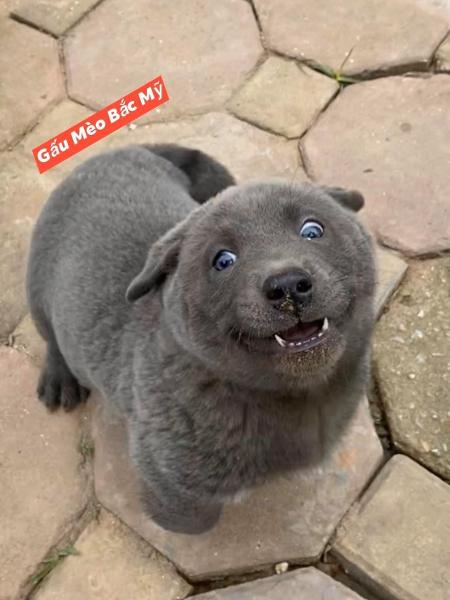

In [ ]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Aula 07/dataset_teste/duno.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/drive/MyDrive/Colab Notebooks/Aula 07/dataset_teste/duno.jpg')